In [1]:
#!pip install tradingeconomics
#!pip install config

In [2]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
config.read('config.ini')


['config.ini']

In [3]:
#import API data from CSO with :
#reference: https://data.cso.ie/
# data also available in Data/BAA14.20230507T230558.csv
# BAA14
import requests
import pandas as pd
import io

#surpress warnings
pd.options.mode.chained_assignment = None  # default='warn'

url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA14%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)
data = response.json().get('result')
#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
df = pd.read_csv(io.StringIO(data))

print(df.head(5))   
print(df.info())
print(df.tail(5))







            Statistic Label  Year  \
0  Construction Enterprises  2019   
1  Construction Enterprises  2019   
2  Construction Enterprises  2019   
3  Construction Enterprises  2019   
4  Construction Enterprises  2019   

                                 Nace Rev 2 Activity    UNIT    VALUE  
0             Development of building projects (411)  Number   3846.0  
1  Construction of residential and non-residentia...  Number  12227.0  
2           Construction of roads and railways (421)  Number    777.0  
3             Construction of utility projects (422)  Number    304.0  
4  Construction of other civil engineering projec...  Number    540.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      880 non-null    object 
 1   Year                 880 non-null    int64  
 2   Nace Rev 2 Activity  880 non-null   

In [4]:
#print unique values in each column
print(df['Statistic Label'].unique())

['Construction Enterprises' 'Employees - Manual' 'Employees - Other'
 'Employees - Total'
 'Persons Engaged - Proprietors and Unpaid Family Workers'
 'Persons Engaged - Labour only subcontract basis'
 'Persons Engaged - Total' 'Wages and Salaries - Manual Employees'
 'Wages and Salaries - Other Employees'
 'Wages and Salaries - Manual and Other Employees'
 'Wages and Salaries - Labour only subcontractors'
 'Wages and Salaries - Total' 'Labour Costs - Other'
 'Labour Costs - Total' 'Turnover - Principal' 'Turnover - Subcontractor'
 'Turnover - Manufacturing' 'Turnover - Factored goods' 'Turnover - Other'
 'Turnover - Total' 'Payments to other subcontractors'
 'Turnover less payments to subcontractors' 'Assets made for own use'
 'Purchases - Materials and energy' 'Purchases - Industrial services'
 'Purchases - Factored goods' 'Purchases - Other goods/services'
 'Purchases - Total' 'Stocks at end of year - Work in progress'
 'Stocks at end of year - Unsold finished work'
 'Stocks at end o

In [5]:
print(df['Nace Rev 2 Activity'].unique())

['Development of building projects (411)'
 'Construction of residential and non-residential buildings (412)'
 'Construction of roads and railways (421)'
 'Construction of utility projects (422)'
 'Construction of other civil engineering projects (429)'
 'Demolition and site preparation (431)'
 'Electrical, plumbing and other construction installation activities (432)'
 'Building completion and finishing (433)'
 'Other specialised construction activities (439)'
 'Construction (41 to 43)']


In [6]:
#drop all rows where 'Nace Rev 2 Activity' not equal to 'Building completion and finishing (433)'
df = df[df['Nace Rev 2 Activity'] == 'Building completion and finishing (433)']

In [7]:
#drop column 'Construction of residential and non-residential buildings (412)'
df = df.drop(columns=['Nace Rev 2 Activity'])


In [8]:
print(df.columns.to_list())

['Statistic Label', 'Year', 'UNIT', 'VALUE']


In [9]:
#check for null values
print(df.isnull().sum())

Statistic Label     0
Year                0
UNIT                0
VALUE              62
dtype: int64


In [10]:
#drop rowns with null values
df = df.dropna()

In [11]:
df.to_csv('Data/BAA14.csv', index=False)

In [12]:
#print list of VALUE where Year = 2019
print(df.loc[df['Year'] == 2019, 'VALUE'].to_list())


[20096.0, 18308.0, 35597.0, 495965.0, 47975.0, 543939.0, 3078074.0, 10364.0, 2787627.0, 3039214.0, 1926951.0, 1112264.0, 1107713.0]


In [13]:
#normalize data in VALUE column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['VALUE'] = scaler.fit_transform(df[['VALUE']])
print(df.head(5))

              Statistic Label  Year    UNIT     VALUE
7    Construction Enterprises  2019  Number  0.004686
17   Construction Enterprises  2020  Number  0.005014
67          Employees - Total  2019  Number  0.004104
77          Employees - Total  2020  Number  0.003709
127   Persons Engaged - Total  2019  Number  0.009732


[0.004686275377753244, 0.004104315357234921, 0.009731556293891112, 0.15957259137553476, 0.01376036006009681, 0.17518721666879314, 1.0, 0.0015186943264756656, 0.9054650212083417, 0.9873518085026052, 0.6253313396537403, 0.3601662036157033, 0.3586849396037464]
[0.005013709259543754, 0.003708855947318948, 0.009612430249422597, 0.13617864480128733, 0.010527357328660294, 0.14828621236463244, 0.8848825794759495, 0.0, 0.7792096410074808, 0.8758794496506938, 0.5642232591323457, 0.30980159980419064, 0.305799159998646]
['Construction Enterprises', 'Employees - Total', 'Persons Engaged - Total', 'Wages and Salaries - Total', 'Labour Costs - Other', 'Labour Costs - Total', 'Turnover - Total', 'Purchases - Factored goods', 'Purchases - Total', 'Production value', 'Intermediate consumption', 'Gross value added at basic prices', 'Gross value added at factor cost']


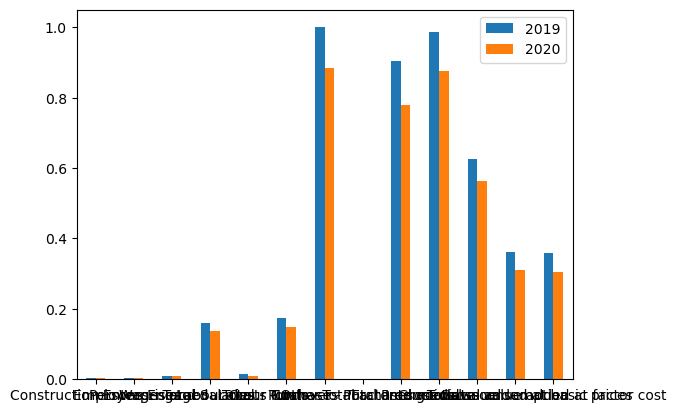

In [14]:
#plot a bar plot for each 'Statistic Label' 'VALUE' comparing 2019 and 2020
#reference: https://stackoverflow.com/questions/33458566/how-to-plot-a-bar-chart-using-matplotlib-using-a-dictionary
# list of values for each label for 2019 where UNIT = Number

nineteen = df.loc[df['Year'] == 2019, 'VALUE'].to_list()
twenty = df.loc[df['Year'] == 2020, 'VALUE'].to_list()
index_ = df.loc[df['Year'] == 2019, 'Statistic Label'].to_list()
# list of values for each label for 2020
print(nineteen)
print(twenty)
print(index_)
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame({'2019': nineteen, '2020': twenty}, index=index_)
ax = df.plot.bar(rot=0)
plt.show()

In [15]:
#BAA15 - Persons Engaged 


url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA15%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)

data = response.json().get('result')

#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
personsEngaged_df = pd.read_csv(io.StringIO(data))
print(personsEngaged_df.head(5))
print(personsEngaged_df.info()) 

print(personsEngaged_df.tail(5))


            Statistic Label  Year Persons Engaged    UNIT    VALUE
0  Construction Enterprises  2019           0 - 9  Number  56935.0
1  Construction Enterprises  2019         10 - 49  Number   2007.0
2  Construction Enterprises  2019        50 - 249  Number    208.0
3  Construction Enterprises  2019    250 and over  Number     25.0
4  Construction Enterprises  2020           0 - 9  Number  60553.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  352 non-null    object 
 1   Year             352 non-null    int64  
 2   Persons Engaged  352 non-null    object 
 3   UNIT             352 non-null    object 
 4   VALUE            104 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.9+ KB
None
                      Statistic Label  Year Persons Engaged           UNIT  \
347  Gross value added at 

2

    2.1

In [16]:
# reference https://ec.europa.eu/eurostat/databrowser/view/EI_ISBU_Q__custom_6200052/settings_1/table?lang=en
df = pd.read_csv('Data/ei_isbu_q__custom_6200052_linear.csv', header=0,  parse_dates=True)

In [17]:
df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,indic,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q1,90.4,NaN
1,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q2,88.9,NaN
2,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q3,87.0,NaN
3,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q4,79.2,NaN
4,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2011-Q1,81.2,NaN


    2.2

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     7252 non-null   object 
 1   LAST UPDATE  7252 non-null   object 
 2   freq         7252 non-null   object 
 3   unit         7252 non-null   object 
 4   s_adj        7252 non-null   object 
 5   indic        7252 non-null   object 
 6   nace_r2      7252 non-null   object 
 7   geo          7252 non-null   object 
 8   TIME_PERIOD  7252 non-null   object 
 9   OBS_VALUE    7248 non-null   float64
 10  OBS_FLAG     634 non-null    object 
dtypes: float64(1), object(10)
memory usage: 623.3+ KB


In [19]:
#show rows where 'OBS_VALUE' is null
print(df[df['OBS_VALUE'].isnull()])

                  DATAFLOW        LAST UPDATE freq   unit s_adj   indic  \
156   ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI   
1356  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI   
3120  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-HWI   
6737  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-WSI   

     nace_r2 geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
156        F  BE     2022-Q4        NaN        c  
1356       F  NL     2022-Q4        NaN        c  
3120       F  NL     2022-Q4        NaN        c  
6737       F  NL     2022-Q4        NaN        c  


In [20]:
#remove rows where 'OBS_VALUE' is null
df = df[df['OBS_VALUE'].notna()]

    2.3

In [21]:
#loop through columns and print unique values
for col in df.columns:
    print(col, ": ", df[col].unique())
    


DATAFLOW :  ['ESTAT:EI_ISBU_Q(1.0)']
LAST UPDATE :  ['13/05/23 11:00:00']
freq :  ['Q']
unit :  ['I2015']
s_adj :  ['NSA']
indic :  ['IS-EPI' 'IS-HWI' 'IS-IP' 'IS-WSI']
nace_r2 :  ['F']
geo :  ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'BA']
TIME_PERIOD :  ['2010-Q1' '2010-Q2' '2010-Q3' '2010-Q4' '2011-Q1' '2011-Q2' '2011-Q3'
 '2011-Q4' '2012-Q1' '2012-Q2' '2012-Q3' '2012-Q4' '2013-Q1' '2013-Q2'
 '2013-Q3' '2013-Q4' '2014-Q1' '2014-Q2' '2014-Q3' '2014-Q4' '2015-Q1'
 '2015-Q2' '2015-Q3' '2015-Q4' '2016-Q1' '2016-Q2' '2016-Q3' '2016-Q4'
 '2017-Q1' '2017-Q2' '2017-Q3' '2017-Q4' '2018-Q1' '2018-Q2' '2018-Q3'
 '2018-Q4' '2019-Q1' '2019-Q2' '2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2'
 '2020-Q3' '2020-Q4' '2021-Q1' '2021-Q2' '2021-Q3' '2021-Q4' '2022-Q1'
 '2022-Q2' '2022-Q3' '2022-Q4' '2023-Q1']
OBS_VALUE :  [ 90.4  88.9  87.  ... 343.7 464.7 513.9]
OBS_FLAG 

In [22]:
#count the number of entries for each unique value on 'OBS_FLAG'
print(df['OBS_FLAG'].value_counts())

p    351
e    279
Name: OBS_FLAG, dtype: int64


2.4

In [23]:
#drop column 'LAST UPDATE'
df = df.drop(columns=['LAST UPDATE'])
#drop column 'FREQ'
df = df.drop(columns=['freq'])
#drop column 'DATAFLOW'
df = df.drop(columns=['DATAFLOW'])
#drop column 's_adj'
df = df.drop(columns=['s_adj'])
#drop column 'unit'
df = df.drop(columns=['unit'])
#drop column 'nace_r2'
df = df.drop(columns=['nace_r2'])
#drop column 'OBS_FLAG'
df = df.drop(columns=['OBS_FLAG'])

df.head(5)



,indic,geo,TIME_PERIOD,OBS_VALUE
0,IS-EPI,AL,2010-Q1,90.4
1,IS-EPI,AL,2010-Q2,88.9
2,IS-EPI,AL,2010-Q3,87.0
3,IS-EPI,AL,2010-Q4,79.2
4,IS-EPI,AL,2011-Q1,81.2


In [24]:
#create a column for each unique value in 'indic'setting its row value =  to 'OBS_VALUE'
df_ = pd.get_dummies(df, columns=['indic'])
#remove 'indic_' in column names
df_.columns = df_.columns.str.replace('indic_', '')
#if the value in 'IS-EPI' or 'IS-HWI' or 'IS-IP' or 'IS-WSI' = 1, set its value to 'OBS_VALUE'
df_['IS-EPI'] = df_['IS-EPI'] * df_['OBS_VALUE']
df_['IS-HWI'] = df_['IS-HWI'] * df_['OBS_VALUE']
df_['IS-IP'] = df_['IS-IP'] * df_['OBS_VALUE']
df_['IS-WSI'] = df_['IS-WSI'] * df_['OBS_VALUE']



df_.head(5)

,geo,TIME_PERIOD,OBS_VALUE,IS-EPI,IS-HWI,IS-IP,IS-WSI
0,AL,2010-Q1,90.4,90.4,0.0,0.0,0.0
1,AL,2010-Q2,88.9,88.9,0.0,0.0,0.0
2,AL,2010-Q3,87.0,87.0,0.0,0.0,0.0
3,AL,2010-Q4,79.2,79.2,0.0,0.0,0.0
4,AL,2011-Q1,81.2,81.2,0.0,0.0,0.0


In [25]:
#reset df_ index to 'TIME_PERIOD'
df_ = df_.set_index('TIME_PERIOD')
df_.head()

,geo,OBS_VALUE,IS-EPI,IS-HWI,IS-IP,IS-WSI
TIME_PERIOD,,,,,,
2010-Q1,AL,90.4,90.4,0.0,0.0,0.0
2010-Q2,AL,88.9,88.9,0.0,0.0,0.0
2010-Q3,AL,87.0,87.0,0.0,0.0,0.0
2010-Q4,AL,79.2,79.2,0.0,0.0,0.0
2011-Q1,AL,81.2,81.2,0.0,0.0,0.0


In [26]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7248 entries, 2010-Q1 to 2020-Q3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geo        7248 non-null   object 
 1   OBS_VALUE  7248 non-null   float64
 2   IS-EPI     7248 non-null   float64
 3   IS-HWI     7248 non-null   float64
 4   IS-IP      7248 non-null   float64
 5   IS-WSI     7248 non-null   float64
dtypes: float64(5), object(1)
memory usage: 396.4+ KB


In [27]:
#drop column 'OBS_VALUE'
df_ = df_.drop(columns=['OBS_VALUE'])
df_.head(5)

,geo,IS-EPI,IS-HWI,IS-IP,IS-WSI
TIME_PERIOD,,,,,
2010-Q1,AL,90.4,0.0,0.0,0.0
2010-Q2,AL,88.9,0.0,0.0,0.0
2010-Q3,AL,87.0,0.0,0.0,0.0
2010-Q4,AL,79.2,0.0,0.0,0.0
2011-Q1,AL,81.2,0.0,0.0,0.0


In [28]:
def indic(time, indic):
    #s = df_.loc['2010-Q1'] and where column = 'IS-EPI'
    s = df_.loc[time, [indic,'geo']]
    #transpose s so geo is column names and TIME_PERIOD is index

    s = s.set_index('geo').T
    s= s.loc[indic]
    #drop rows where value is 0
    s = s[s != 0]
    return s
s = indic('2010-Q1', 'IS-EPI')
s

geo
AL     90.4
AT     87.3
BE     98.8
BG    131.8
CH     92.7
CY    176.5
CZ    105.1
DE     89.5
DK     98.6
EE     81.5
EL    144.8
ES    155.4
FI     94.9
FR    109.8
HR    132.5
HU     96.8
IE     98.0
IS     82.5
IT    129.1
LT     76.4
LU    106.7
LV     69.9
ME     91.6
MK     61.4
MT    109.0
NL    125.7
NO     83.1
PL    108.9
PT    181.2
RO     87.5
RS    125.0
SE     80.4
SI    148.9
SK    114.6
TR     48.7
UK     96.7
Name: IS-EPI, dtype: float64

<BarContainer object of 36 artists>

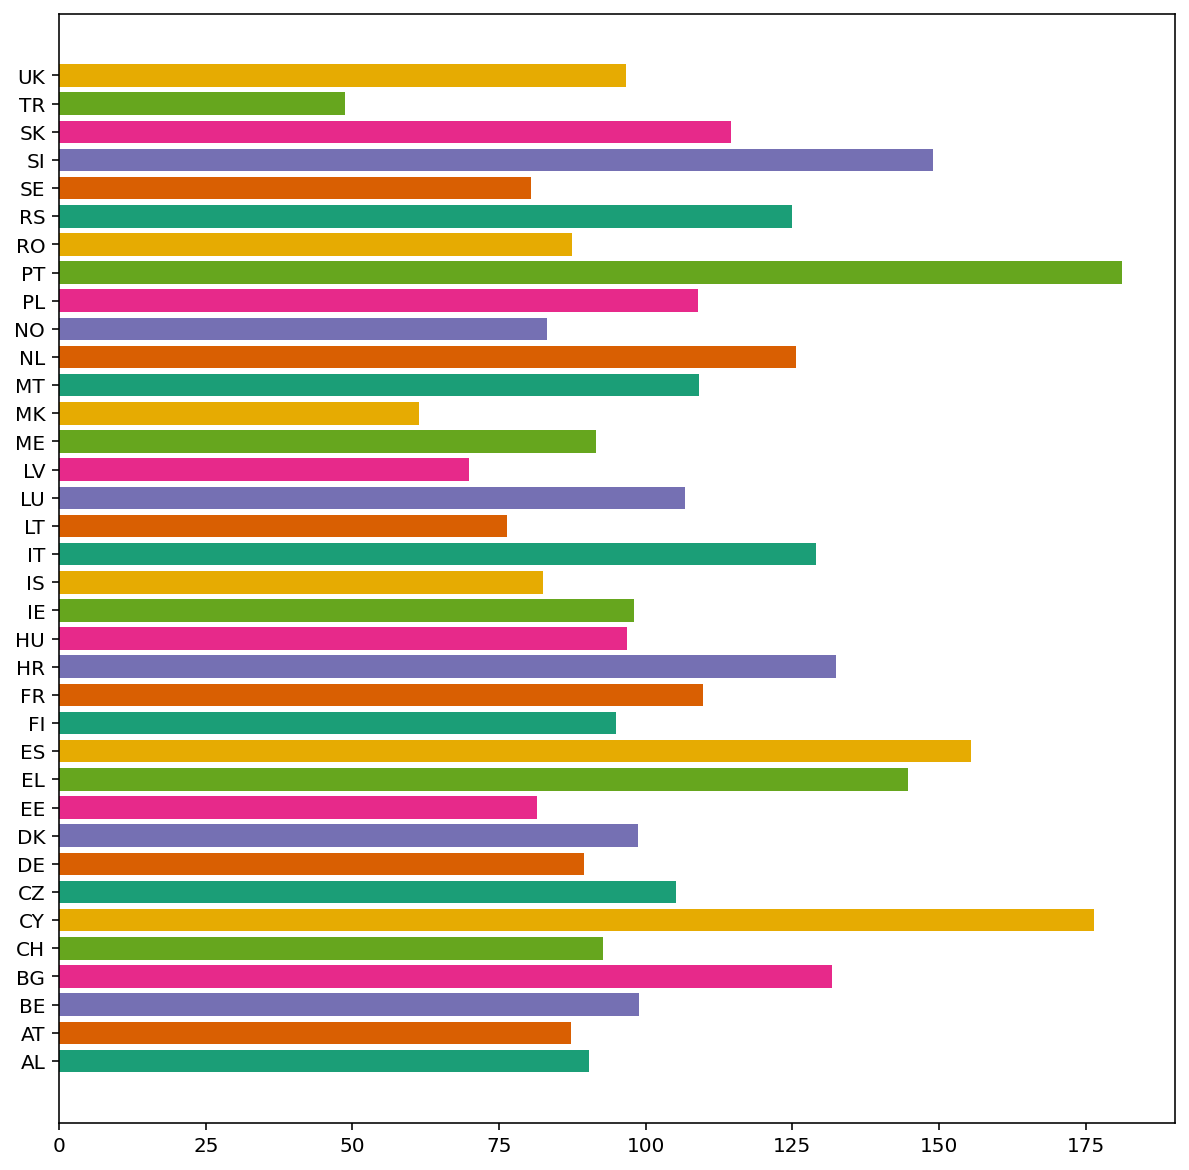

In [29]:


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10), dpi=144)
colors = plt.cm.Dark2(range(6))
y = indic('2010-Q1', 'IS-EPI').index
width = s.values
ax.barh(y=y, width=width, color=colors)


In [30]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
#nice_axes(ax)
#fig

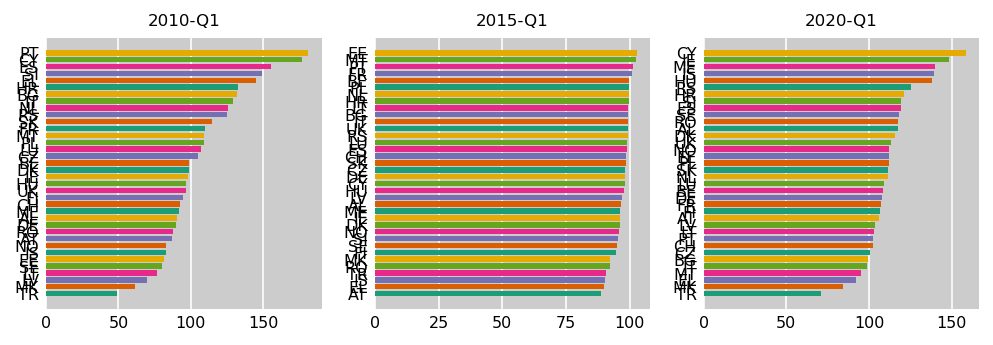

In [31]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2010-Q1', '2015-Q1', '2020-Q1']
for ax, date in zip(ax_array, dates):
    s = indic(date, 'IS-EPI').sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

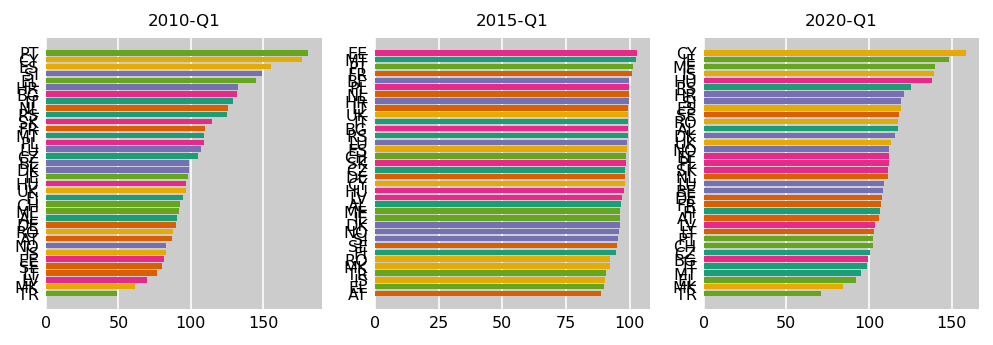

In [32]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2010-Q1', '2015-Q1', '2020-Q1']
for ax, date in zip(ax_array, dates):
    s =  indic(date, 'IS-EPI')
    y = indic(date, 'IS-EPI').rank(method='first').values
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [33]:
df_2 = df_.iloc[:-40].copy()
#put index in column
df_2 = df_2.reset_index()
df_2.index = df_2.index * 5
df_2.head()

,TIME_PERIOD,geo,IS-EPI,IS-HWI,IS-IP,IS-WSI
0,2010-Q1,AL,90.4,0.0,0.0,0.0
5,2010-Q2,AL,88.9,0.0,0.0,0.0
10,2010-Q3,AL,87.0,0.0,0.0,0.0
15,2010-Q4,AL,79.2,0.0,0.0,0.0
20,2011-Q1,AL,81.2,0.0,0.0,0.0


In [34]:
last_idx = df_2.index[-1] + 1
df_expanded = df_2.reindex(range(last_idx))
df_expanded.head(10)

,TIME_PERIOD,geo,IS-EPI,IS-HWI,IS-IP,IS-WSI
0,2010-Q1,AL,90.4,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-Q2,AL,88.9,0.0,0.0,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_expanded['TIME_PERIOD'] = df_expanded['TIME_PERIOD'].fillna(method='ffill')
df_expanded = df_expanded.set_index('TIME_PERIOD')
df_expanded.head(10)

,geo,IS-EPI,IS-HWI,IS-IP,IS-WSI
TIME_PERIOD,,,,,
2010-Q1,AL,90.4,0.0,0.0,0.0
2010-Q1,NaN,NaN,NaN,NaN,NaN
2010-Q1,NaN,NaN,NaN,NaN,NaN
2010-Q1,NaN,NaN,NaN,NaN,NaN
2010-Q1,NaN,NaN,NaN,NaN,NaN
2010-Q2,AL,88.9,0.0,0.0,0.0
2010-Q2,NaN,NaN,NaN,NaN,NaN
2010-Q2,NaN,NaN,NaN,NaN,NaN
2010-Q2,NaN,NaN,NaN,NaN,NaN


In [36]:
df_expanded = df_expanded.interpolate()

#forword fill 'geo' column
df_expanded['geo'] = df_expanded['geo'].fillna(method='ffill')
#forword fill 'IS-EP' column
df_expanded['IS-EPI'] = df_expanded['IS-EPI'].fillna(method='ffill')
#forword fill 'IS-HWI' column
df_expanded['IS-HWI'] = df_expanded['IS-HWI'].fillna(method='ffill')
#forword fill 'IS-IP' column
df_expanded['IS-IP'] = df_expanded['IS-IP'].fillna(method='ffill')
#forword fill 'IS-WSI' column
df_expanded['IS-WSI'] = df_expanded['IS-WSI'].fillna(method='ffill')
df_expanded.head(10)



,geo,IS-EPI,IS-HWI,IS-IP,IS-WSI
TIME_PERIOD,,,,,
2010-Q1,AL,90.40,0.0,0.0,0.0
2010-Q1,AL,90.10,0.0,0.0,0.0
2010-Q1,AL,89.80,0.0,0.0,0.0
2010-Q1,AL,89.50,0.0,0.0,0.0
2010-Q1,AL,89.20,0.0,0.0,0.0
2010-Q2,AL,88.90,0.0,0.0,0.0
2010-Q2,AL,88.52,0.0,0.0,0.0
2010-Q2,AL,88.14,0.0,0.0,0.0
2010-Q2,AL,87.76,0.0,0.0,0.0


Text(0.5, 1.0, '2020-03-30')

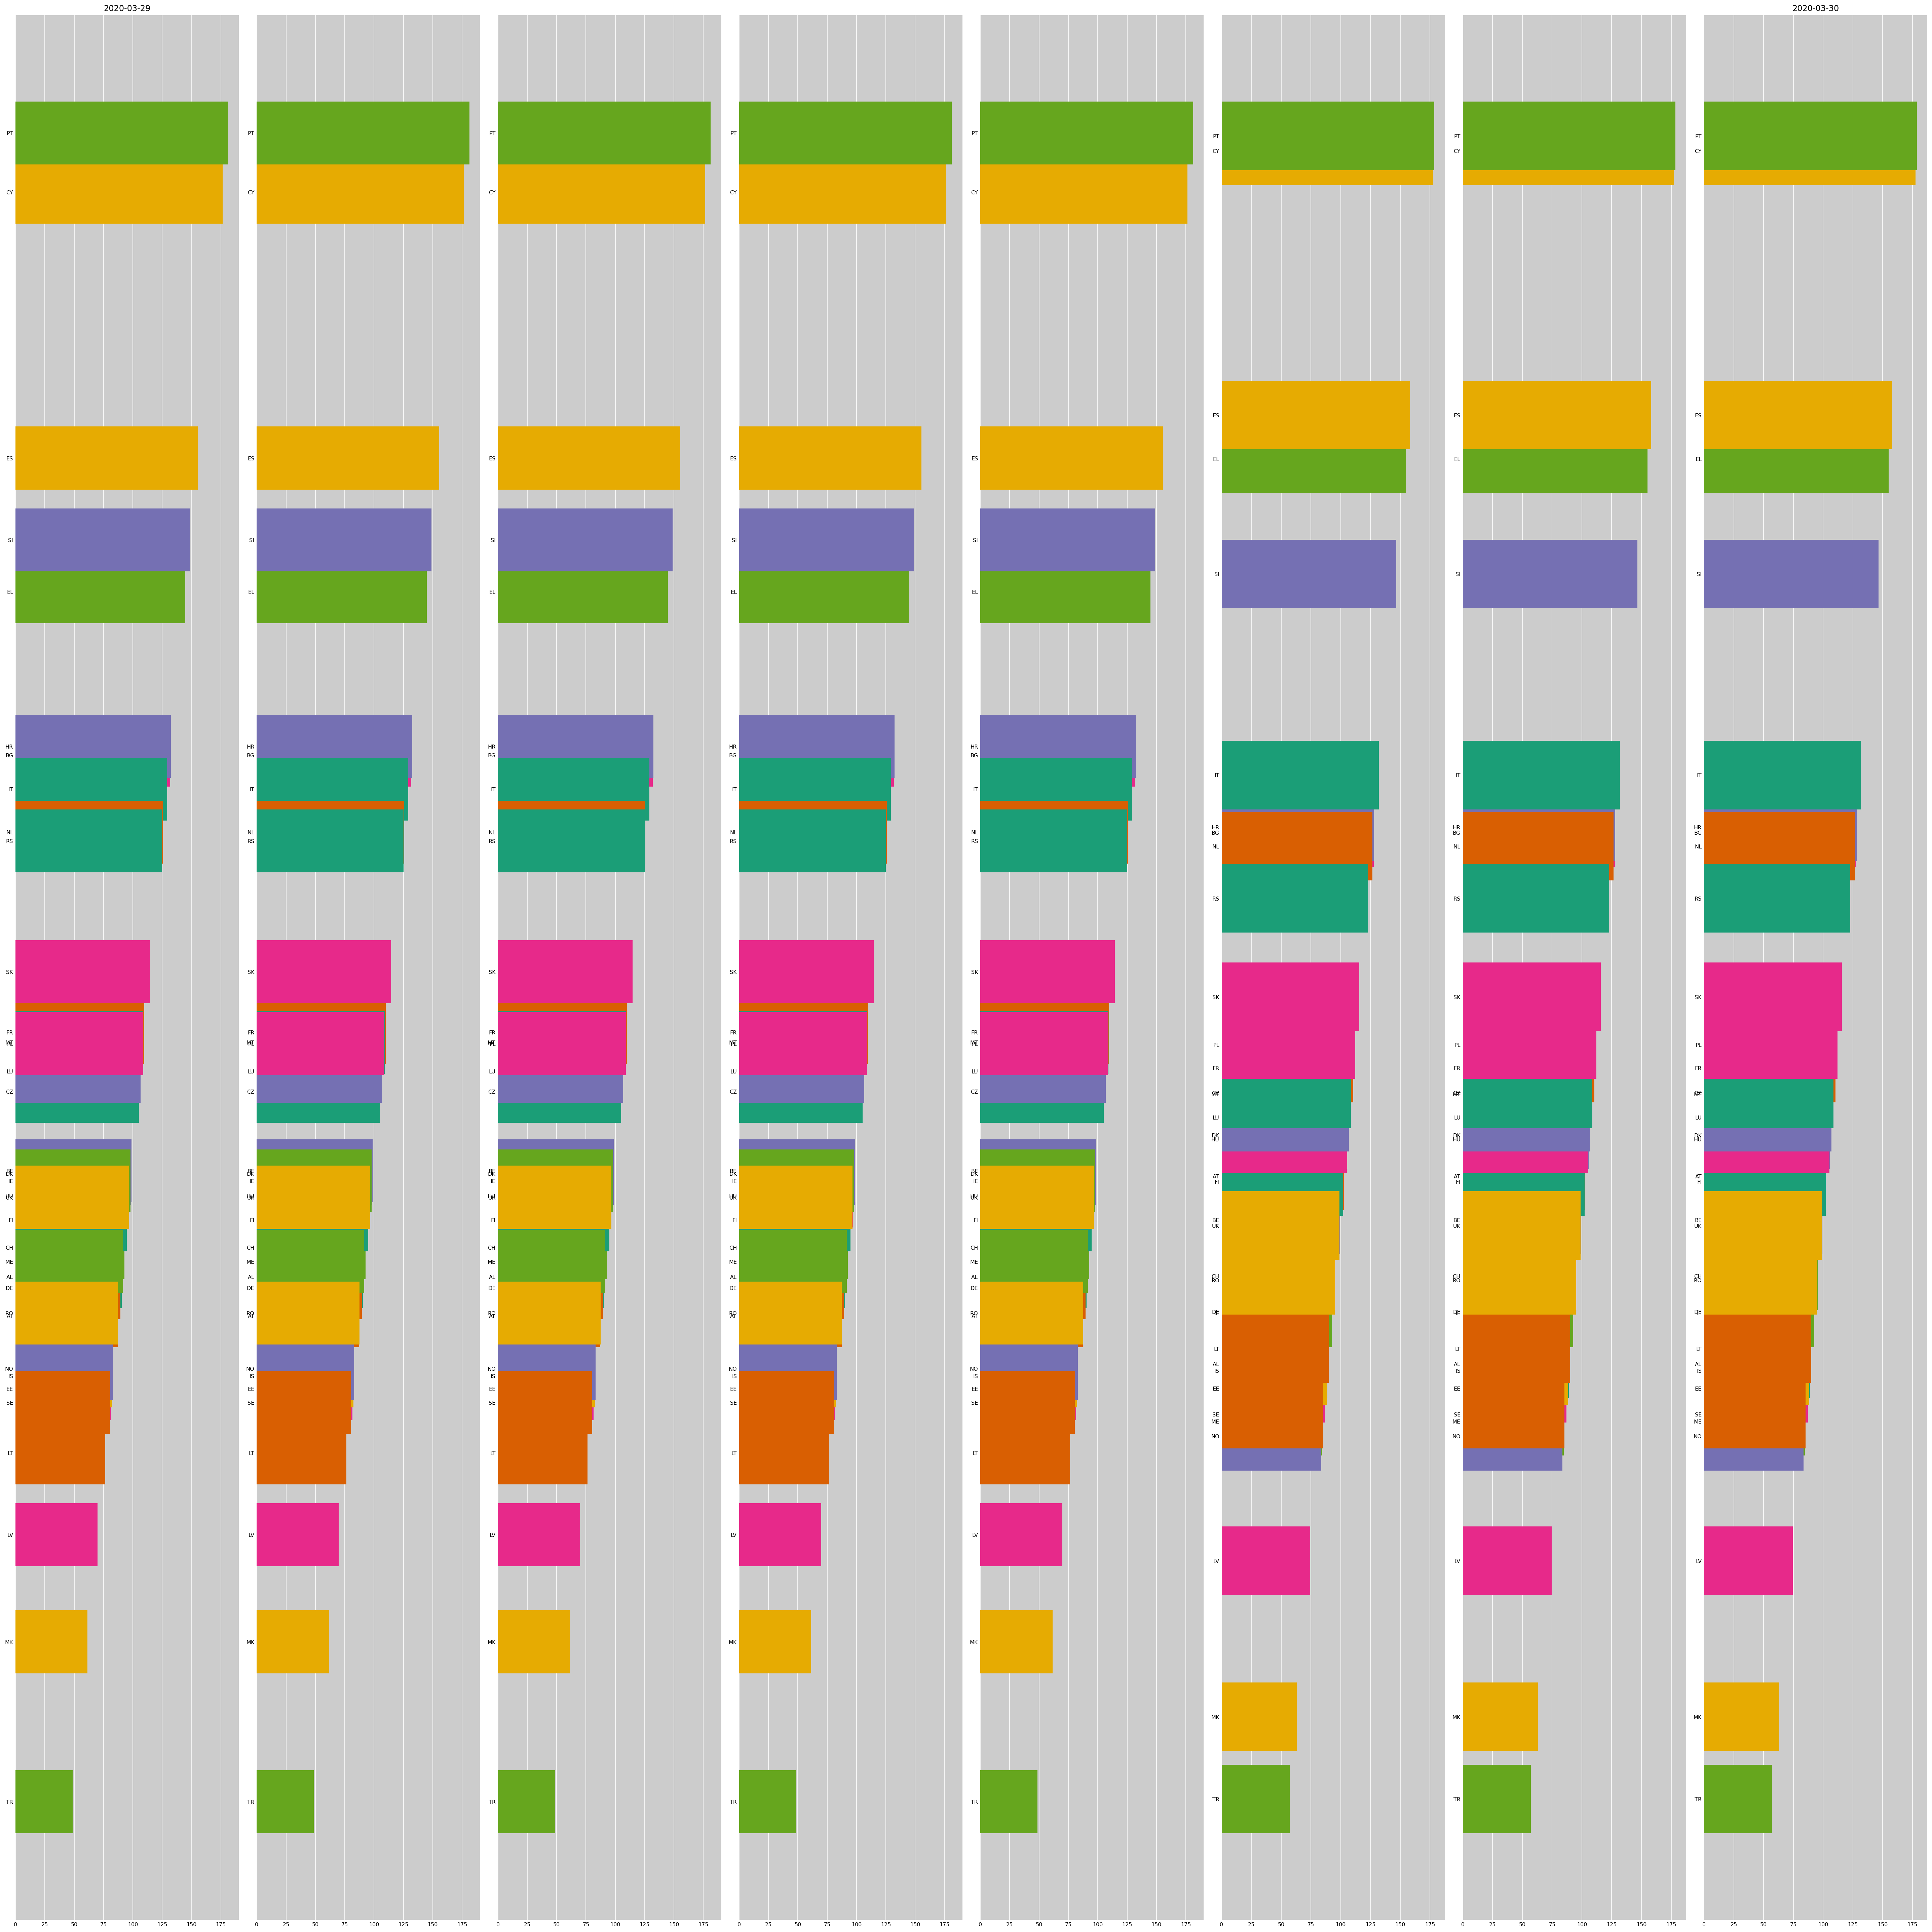

In [49]:
def indic(time, indic):

    #s = df_.loc['2010-Q1'] and where column = 'IS-EPI'
    s = df_.loc[time, [indic,'geo']]
    #transpose s so geo is column names and TIME_PERIOD is index

    s = s.set_index('geo').T
    s= s.loc[indic]
    #drop rows where value is 0
    s = s[s != 0]

    return s

fig, ax_array = plt.subplots(nrows=1, ncols=8, figsize=(40, 40), 
                             dpi=144, tight_layout=True)

for i, ax in enumerate(ax_array.flatten()):
    y = indic(df_expanded.index[i], 'IS-EPI')

    labels = y.index
    width = y.values
    ax.barh(y=y, width=width, color=colors, tick_label=labels, height=5)
    nice_axes(ax)
ax_array[0].set_title('2020-03-29')
ax_array[-1].set_title('2020-03-30')

In [47]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = indic(df_expanded.index[i], 'IS-EPI')
    width = y.values
    labels = y.index
    ax.barh(y=y, width=width, color=colors, tick_label=labels, height=5)
    #date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - ', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=1, repeat=False)


C:\Users\sclifford\Anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [48]:
anim.save('media/covid19.mp4')

In [45]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

KeyboardInterrupt: 

In [ ]:
# https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096
anim.save('media/covid19.mp4')

In [ ]:
#print unique values in 'indic' column
print(df['indic'].unique())

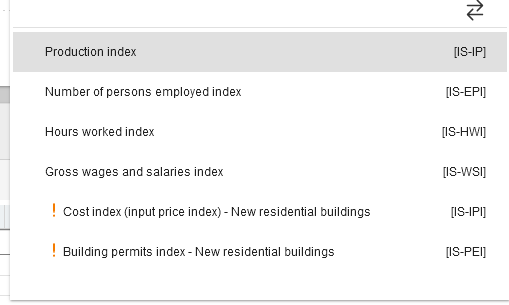

In [ ]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df['indic'] = encoder.fit_transform(df['indic'].values.reshape(-1,1))
print(df.head(5))

In [ ]:
print(encoder.categories_)

In [ ]:
print(df.info())

In [ ]:
#check for null values
print(df.isnull().sum())

In [ ]:
#drop rowns with null values
df = df.dropna()

In [ ]:
#for values in 'TIME_PERIOD' column replace '-Q' with '.'
df['TIME_PERIOD'] = df['TIME_PERIOD'].str.replace('-Q', '.')
df.head(5)

In [ ]:
#convert 'TIME_PERIOD' column to int
df['TIME_PERIOD'] = df['TIME_PERIOD'].astype(float)
df.head(5)

In [ ]:
df.info()

In [ ]:
#pip install pycountry

In [ ]:
import pycountry

# Define a function to get the country name from an ISO-3166-1 alpha-2 code
def get_country_name(iso_2):
    try:
        return pycountry.countries.get(alpha_2=iso_2).name
    except:
        return None

# Add a new column to the dataframe with the country names
df['country_name'] = df['geo'].apply(get_country_name)

df.head(5)


In [ ]:
#df_test = all values in df where indic = 0.0
df_test = df.loc[df['indic'] == 1.0]

In [ ]:
df_test.head(5)

In [ ]:
#print unique values in 'geo' column
print(df_test['geo'].unique())

In [ ]:
import plotly.express as px

fig = px.choropleth(df_test, locations="country_name", locationmode="country names", color="OBS_VALUE",scope='europe')
fig.show()


In [ ]:
fig = px.choropleth(df_test, locations="country_name",
                    scope='europe',
                    color="OBS_VALUE", 
                    hover_name="country_name", 
                    locationmode="country names",
                    # column to add to hover information
                    animation_frame="TIME_PERIOD", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the world (% population)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
    
)
fig.show()